# Analysing Elexon Datasets

## 2025 Generation by Source
### Combined plot

Combined interconnector data:                 PublishTime  SettlementPeriod  Generation
0 2025-01-01 00:30:00+00:00                 1       -2126
1 2025-01-01 01:00:00+00:00                 2       -2038
2 2025-01-01 01:30:00+00:00                 3       -1530
3 2025-01-01 02:00:00+00:00                 4       -1506
4 2025-01-01 02:30:00+00:00                 5       -2538


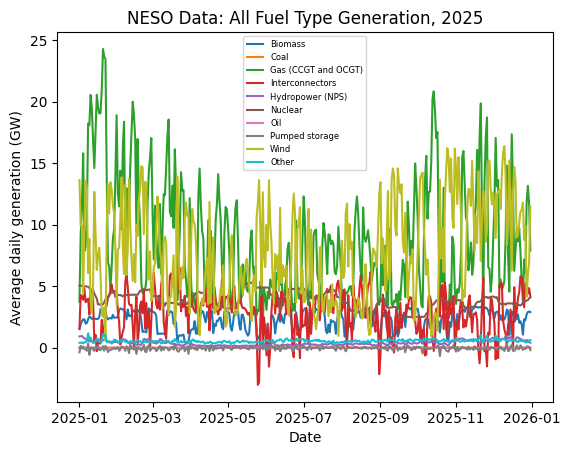

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# eliminating edge effects by skipping settlement period 48 from the previous year
df = pd.read_csv("Elexon2025.csv", skiprows=(list(range(1,21))))
df["PublishTime"] = pd.to_datetime(df["PublishTime"])


# isolating the fuel types
biomass_df = df[df["FuelType"]=="BIOMASS"]
coal_df = df[df["FuelType"]=="COAL"]

gas_df = df[df["FuelType"].isin(["CCGT", "OCGT"])]
gascomb_df = gas_df.groupby(["PublishTime","SettlementPeriod"], as_index=False)["Generation"].sum()

inter_fuel_type=["INTELEC","INTEW","INTFR", "INTGRNL", "INTFA2", "INTNED","INTNEM", "INTNSL", "INTVKL"] 
inter_df = df[df["FuelType"].isin(inter_fuel_type)]
intercomb_df = inter_df.groupby(["PublishTime","SettlementPeriod"], as_index=False)["Generation"].sum()

print("Combined interconnector data:", intercomb_df.head())

hydro_df = df[df["FuelType"]=="NPSHYD"]
nuc_df=df[df["FuelType"]=="NUCLEAR"]
oil_df=df[df["FuelType"]=="OIL"]
ps_df=df[df["FuelType"]=="PS"]
wind_df=df[df["FuelType"]=="WIND"]
other_df=df[df["FuelType"]=="OTHER"]


# averaging the settlement periods into a daily average 
biomass_daily = ( biomass_df.set_index("PublishTime").resample("D")["Generation"].mean())
gascomb_daily = (gascomb_df.set_index("PublishTime").resample("D")["Generation"].mean())
coal_daily = (coal_df.set_index("PublishTime").resample("D")["Generation"].mean())
intercomb_daily = (intercomb_df.set_index("PublishTime").resample("D")["Generation"].mean())
hydro_daily = ( hydro_df.set_index("PublishTime").resample("D")["Generation"].mean())
nuc_daily=(nuc_df.set_index("PublishTime").resample("D")["Generation"].mean())
oil_daily=(oil_df.set_index("PublishTime").resample("D")["Generation"].mean())
ps_daily=(ps_df.set_index("PublishTime").resample("D")["Generation"].mean())
wind_daily=(wind_df.set_index("PublishTime").resample("D")["Generation"].mean())
other_daily=(other_df.set_index("PublishTime").resample("D")["Generation"].mean())


plt.figure()
plt.plot(biomass_daily.index, biomass_daily.values/1000, label='Biomass')
plt.plot(coal_daily.index, coal_daily.values/1000, label='Coal')
plt.plot(gascomb_daily.index, gascomb_daily.values/1000, label='Gas (CCGT and OCGT)')
plt.plot(intercomb_daily.index, intercomb_daily.values/1000, label='Interconnectors')
plt.plot(hydro_daily.index, hydro_daily.values/1000, label='Hydropower (NPS)')
plt.plot(nuc_daily.index, nuc_daily.values/1000, label='Nuclear')
plt.plot(oil_daily.index, oil_daily.values/1000, label='Oil')
plt.plot(ps_daily.index, ps_daily.values/1000, label='Pumped storage')
plt.plot(wind_daily.index, wind_daily.values/1000, label='Wind')
plt.plot(other_daily.index, other_daily.values/1000, label='Other')
plt.xlabel("Date")
plt.ylabel("Average daily generation (GW)")
plt.title("NESO Data: All Fuel Type Generation, 2025")
plt.legend(fontsize="6")
plt.show()


In [ ]:
print(gascomb_df.head(),"\n")
print(gascomb_df)

                PublishTime  SettlementPeriod  Generation
0 2025-01-01 00:30:00+00:00                 1        3711
1 2025-01-01 01:00:00+00:00                 2        3935
2 2025-01-01 01:30:00+00:00                 3        3769
3 2025-01-01 02:00:00+00:00                 4        3719
4 2025-01-01 02:30:00+00:00                 5        3675 

                    PublishTime  SettlementPeriod  Generation
0     2025-01-01 00:30:00+00:00                 1        3711
1     2025-01-01 01:00:00+00:00                 2        3935
2     2025-01-01 01:30:00+00:00                 3        3769
3     2025-01-01 02:00:00+00:00                 4        3719
4     2025-01-01 02:30:00+00:00                 5        3675
...                         ...               ...         ...
17514 2025-12-31 21:30:00+00:00                43        7157
17515 2025-12-31 22:00:00+00:00                44        6348
17516 2025-12-31 22:30:00+00:00                45        6658
17517 2025-12-31 23:00:00+00:0

### Indivdual Plots

In [ ]:
x = biomass_daily.index
y = biomass_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Biomass Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [ ]:
x1 = coal_daily.index
y1 = coal_daily.values/1000

plt.plot(x1,y1)
plt.title("NESO Data: Coal Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [ ]:
x = gascomb_daily.index
y = gascomb_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Gas Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [ ]:
x = intercomb_daily.index
y = intercomb_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: (Net) Interconnector Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [ ]:
x = hydro_daily.index
y = hydro_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Hydropower (Non-Pumped Storage) Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [ ]:
x = nuc_daily.index
y = nuc_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Nuclear Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [1]:
x = oil_daily.index
y = oil_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Oil Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

NameError: name 'oil_daily' is not defined

In [ ]:
x = ps_daily.index
y = ps_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Pumped Storage Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [ ]:
x = wind_daily.index
y = wind_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Wind Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [ ]:
x = other_daily.index
y = other_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: 'Other' Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

### Comparing Gas vs. Wind generation over 1-day period

In [ ]:
wind_df = df[df["FuelType"]=="WIND"]
gas_df = df[df["FuelType"].isin(["CCGT", "OCGT"])]

gas_48h = gas_df.set_index("PublishTime").loc["2025-01-01"]
wind_48h = wind_df.set_index("PublishTime").loc["2025-01-01"]

print(len(gas_48h))
print(len(wind_48h))

plt.scatter(gas_48h.index, gas_48h["Generation"]/1000, label='Gas')
plt.xlabel("Settlement period")
plt.ylabel("Generation (GW)")
#plt.plot(gas_48h.index, wind_48h["Generation"]/1000, label='Wind')
plt.title("Gas generation over a 24h period")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

   Dataset               PublishTime             StartTime SettlementDate  \
1   FUELHH 2025-01-01 00:30:00+00:00  2025-01-01T00:00:00Z     2025-01-01   
15  FUELHH 2025-01-01 00:30:00+00:00  2025-01-01T00:00:00Z     2025-01-01   
21  FUELHH 2025-01-01 01:00:00+00:00  2025-01-01T00:30:00Z     2025-01-01   
35  FUELHH 2025-01-01 01:00:00+00:00  2025-01-01T00:30:00Z     2025-01-01   
41  FUELHH 2025-01-01 01:30:00+00:00  2025-01-01T01:00:00Z     2025-01-01   

    SettlementPeriod FuelType  Generation  
1                  1     CCGT        3710  
15                 1     OCGT           1  
21                 2     CCGT        3934  
35                 2     OCGT           1  
41                 3     CCGT        3769  
                PublishTime  SettlementPeriod  Generation
0 2025-01-01 00:30:00+00:00                 1        3711
1 2025-01-01 01:00:00+00:00                 2        3935
2 2025-01-01 01:30:00+00:00                 3        3769
3 2025-01-01 02:00:00+00:00              

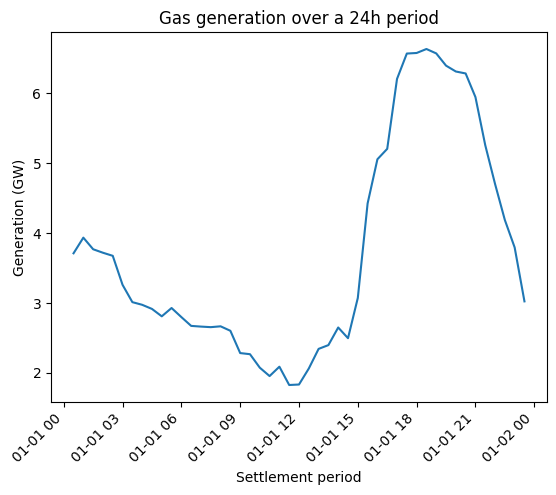

In [7]:
print(gas_df.head())

gascomb_df = gas_df.groupby(["PublishTime","SettlementPeriod"], as_index=False)["Generation"].sum()
print(gascomb_df.head(5)) 

gas_24h = gascomb_df.set_index("PublishTime").loc["2025-01-01"]
print(type(gas_24h))

plt.plot(gas_24h.index, gas_24h["Generation"]/1000) 
plt.xlabel("Settlement period")
plt.ylabel("Generation (GW)")
plt.title("Gas generation over a 24h period")
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
biomass_gen = biomass_df["Generation"]
print(biomass_gen.sum())
print(biomass_gen.max())

                           SettlementPeriod  Generation
PublishTime                                            
2025-01-01 21:30:00+00:00                43        4366
2025-01-01 22:00:00+00:00                44        4368
2025-01-01 22:30:00+00:00                45        4368
2025-01-01 23:00:00+00:00                46        4370
2025-01-01 23:30:00+00:00                47        4428


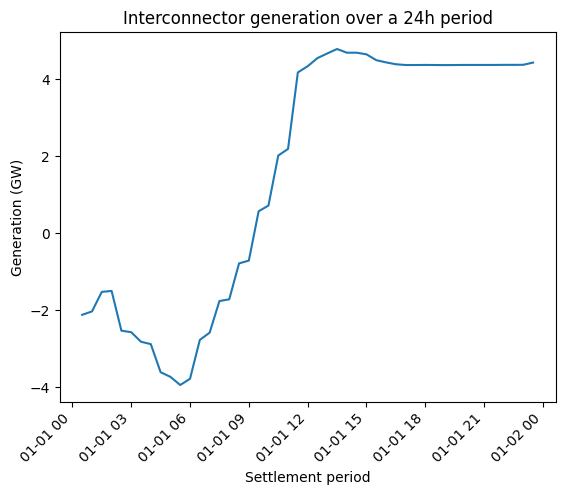

In [11]:
intercomb_df = inter_df.groupby(["PublishTime","SettlementPeriod"], as_index=False)["Generation"].sum()

intercomb_24h = intercomb_df.set_index("PublishTime").loc["2025-01-01"]
print(intercomb_24h.tail(5))

plt.plot(intercomb_24h.index, intercomb_24h["Generation"]/1000)
plt.xlabel("Settlement period")
plt.ylabel("Generation (GW)")
plt.title("Interconnector generation over a 24h period")
plt.xticks(rotation=45, ha='right')
plt.show()
